In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<AxesSubplot:>

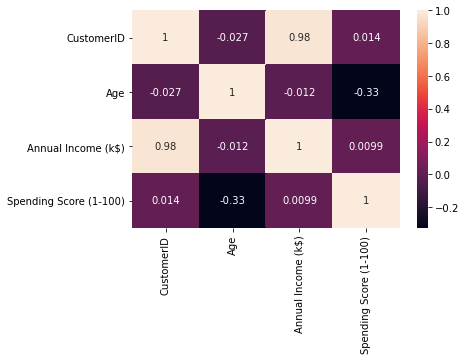

In [10]:
sns.heatmap(df.corr(), annot=True)

In [11]:
x = df[['Annual Income (k$)','Spending Score (1-100)']]

Text(0, 0.5, 'Spending Score (1-100)')

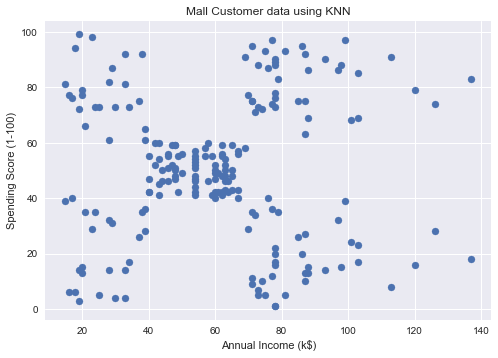

In [12]:
plt.style.use('seaborn')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'])
plt.title('Mall Customer data using KNN')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

In [17]:
x = df.iloc[:,[3,4]].values

In [19]:
y = df.iloc[:,3].values

In [16]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0) 

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
std_scaler = StandardScaler()

In [24]:
std_scaler_result = std_scaler.fit_transform(x_train)

In [25]:
std_scaler_result1 = std_scaler.fit_transform(x_test)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
model = KNeighborsClassifier()

In [28]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [29]:
pred = model.predict(x_test)

In [30]:
pred

array([ 15,  88,  63,  62,  87, 103,  20,  70,  16,  74,  43,  71,  85,
        71,  54,  15,  23,  73,  24,  54,  86,  78,  39,  78,  48,  71,
        81,  86,  62,  28,  15,  40,  71,  62,  16,  88,  71,  15,  54,
        63], dtype=int64)

In [31]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error

In [32]:
print(confusion_matrix(y_test, pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [33]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         0
          25       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         0
          33       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         1
          39       1.00      0.50      0.67         2
          40       0.00      0.00      0.00         0
          43       0.00      0.00      0.00         1
          46       0.00      0.00      0.00         2
          48       0.00      0.00      0.00         0
          54       1.00    

C:\Users\shyam.DESKTOP-3EM50G2\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shyam.DESKTOP-3EM50G2\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shyam.DESKTOP-3EM50G2\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shyam.